In [1]:
library(tidyverse)
library(ggplot2)
#library(sf)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# load data
data = read.csv("hotel_bookings.csv")
data

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,0,2015,July,27,1,0,2,2,⋯,No Deposit,NULL,NULL,0,Transient,107.00,0,0,Check-Out,2015-07-03
Resort Hotel,0,9,2015,July,27,1,0,2,2,⋯,No Deposit,303,NULL,0,Transient,103.00,0,1,Check-Out,2015-07-03
Resort Hotel,1,85,2015,July,27,1,0,3,2,⋯,No Deposit,240,NULL,0,Transient,82.00,0,1,Canceled,2015-05-06


In [3]:
# Replace 'NULL' with 'NA'
datanew = mutate_all(data, ~na_if(., "NULL"))

In [4]:
# Calculate number of NA's and NA rate for each column
f1 = function(x){sum(is.na(x))}
f2 = function(x){round(sum(is.na(x))/length(x)*100, 2)}
df = data.frame(#colnames = colnames(datanew), 
                na_num = apply(datanew, 2, f1), 
                na_rate = apply(datanew, 2, f2))
df = df %>% arrange(desc(na_num))
print(df)

                               na_num na_rate
company                        112593   94.31
agent                           16340   13.69
country                           488    0.41
children                            4    0.00
hotel                               0    0.00
is_canceled                         0    0.00
lead_time                           0    0.00
arrival_date_year                   0    0.00
arrival_date_month                  0    0.00
arrival_date_week_number            0    0.00
arrival_date_day_of_month           0    0.00
stays_in_weekend_nights             0    0.00
stays_in_week_nights                0    0.00
adults                              0    0.00
babies                              0    0.00
meal                                0    0.00
market_segment                      0    0.00
distribution_channel                0    0.00
is_repeated_guest                   0    0.00
previous_cancellations              0    0.00
previous_bookings_not_canceled    

In [5]:
df_na = df[1:4, ]
print(df_na)

         na_num na_rate
company  112593   94.31
agent     16340   13.69
country     488    0.41
children      4    0.00


In [6]:
# Remove column comany
# Replace NA with 0, 'Unknown' and median, seperately
datanew = datanew %>% select(-company) %>% 
                    mutate(agent = as.integer(ifelse(is.na(agent), 0, agent)), 
                           country = ifelse(is.na(country), 'Unknown', country), 
                           children = ifelse(is.na(children), median(children, na.rm = TRUE), children))
datanew

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,0,2015,July,27,1,0,2,2,⋯,0,No Deposit,0,0,Transient,107.00,0,0,Check-Out,2015-07-03
Resort Hotel,0,9,2015,July,27,1,0,2,2,⋯,0,No Deposit,303,0,Transient,103.00,0,1,Check-Out,2015-07-03
Resort Hotel,1,85,2015,July,27,1,0,3,2,⋯,0,No Deposit,240,0,Transient,82.00,0,1,Canceled,2015-05-06


In [7]:
# No NA's remained
sum(is.na(datanew))

[1] 0

In [11]:
datanew %>% filter(adults + children + babies == 0)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
Resort Hotel,0,1,2015,October,41,6,0,3,0,⋯,1,No Deposit,0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
Resort Hotel,0,0,2015,October,42,12,0,0,0,⋯,0,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-10-12
Resort Hotel,0,36,2015,November,47,20,1,2,0,⋯,0,No Deposit,38,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
Resort Hotel,0,165,2015,December,53,30,1,4,0,⋯,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
Resort Hotel,0,165,2015,December,53,30,2,4,0,⋯,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
Resort Hotel,1,0,2016,February,8,15,0,0,0,⋯,0,No Deposit,0,0,Transient,0.00,0,0,Canceled,2016-02-15
Resort Hotel,1,0,2016,November,48,21,0,0,0,⋯,0,No Deposit,0,0,Group,0.00,0,0,Canceled,2016-11-21
Resort Hotel,0,31,2016,December,53,27,2,8,0,⋯,3,No Deposit,0,0,Transient,28.00,1,0,Check-Out,2017-01-06
Resort Hotel,0,4,2017,January,2,14,0,1,0,⋯,0,No Deposit,168,0,Transient-Party,0.00,0,0,Check-Out,2017-01-15


In [9]:
datanew %>% filter(adults == 0 & children == 0 & babies == 0)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
Resort Hotel,0,1,2015,October,41,6,0,3,0,⋯,1,No Deposit,0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
Resort Hotel,0,0,2015,October,42,12,0,0,0,⋯,0,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-10-12
Resort Hotel,0,36,2015,November,47,20,1,2,0,⋯,0,No Deposit,38,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
Resort Hotel,0,165,2015,December,53,30,1,4,0,⋯,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
Resort Hotel,0,165,2015,December,53,30,2,4,0,⋯,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
Resort Hotel,1,0,2016,February,8,15,0,0,0,⋯,0,No Deposit,0,0,Transient,0.00,0,0,Canceled,2016-02-15
Resort Hotel,1,0,2016,November,48,21,0,0,0,⋯,0,No Deposit,0,0,Group,0.00,0,0,Canceled,2016-11-21
Resort Hotel,0,31,2016,December,53,27,2,8,0,⋯,3,No Deposit,0,0,Transient,28.00,1,0,Check-Out,2017-01-06
Resort Hotel,0,4,2017,January,2,14,0,1,0,⋯,0,No Deposit,168,0,Transient-Party,0.00,0,0,Check-Out,2017-01-15


In [10]:
datanew %>% filter(adr == 0)

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,3,No Deposit,0,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,4,No Deposit,0,0,Transient,0,0,0,Check-Out,2015-07-01
Resort Hotel,0,32,2015,July,27,4,0,1,4,⋯,2,No Deposit,0,0,Transient,0,0,1,Check-Out,2015-07-05
Resort Hotel,0,111,2015,July,28,6,0,0,2,⋯,0,No Deposit,240,0,Transient,0,0,2,Check-Out,2015-07-06
Resort Hotel,0,0,2015,July,28,6,0,0,1,⋯,0,No Deposit,250,0,Transient,0,0,0,Check-Out,2015-07-06
Resort Hotel,0,8,2015,July,28,7,0,0,2,⋯,0,No Deposit,0,0,Transient,0,0,1,Check-Out,2015-07-07
Resort Hotel,0,8,2015,July,28,7,0,0,2,⋯,0,No Deposit,240,0,Transient,0,0,1,Check-Out,2015-07-07
Resort Hotel,1,57,2015,July,29,15,0,2,2,⋯,0,No Deposit,305,0,Transient-Party,0,0,0,Canceled,2015-07-13
Resort Hotel,0,57,2015,July,29,15,0,2,1,⋯,1,No Deposit,305,0,Transient-Party,0,0,0,Check-Out,2015-07-17


In [8]:
# Remove rows with no customer
datanew = datanew %>% filter(adults != 0 | children != 0 | babies != 0)
datanew

hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
Resort Hotel,0,0,2015,July,27,1,0,2,2,⋯,0,No Deposit,0,0,Transient,107.00,0,0,Check-Out,2015-07-03
Resort Hotel,0,9,2015,July,27,1,0,2,2,⋯,0,No Deposit,303,0,Transient,103.00,0,1,Check-Out,2015-07-03
Resort Hotel,1,85,2015,July,27,1,0,3,2,⋯,0,No Deposit,240,0,Transient,82.00,0,1,Canceled,2015-05-06


In [8]:
# write.csv(datanew, "./data_cleaned.csv", row.names = FALSE)

In [9]:
# data2 = read.csv("data_cleaned.csv")
# data2

In [9]:
str(datanew)

'data.frame':	119210 obs. of  31 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                 

In [10]:
summary(datanew)

    hotel            is_canceled       lead_time     arrival_date_year
 Length:119210      Min.   :0.0000   Min.   :  0.0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18.0   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69.0   Median :2016     
                    Mean   :0.3708   Mean   :104.1   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:161.0   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737.0   Max.   :2017     
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119210      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.16            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Max.   :53.00            Max.   :31.0             
 stays

# Q1

In [36]:
data1 = datanew %>% select(hotel, is_canceled, lead_time, month = arrival_date_month, 
                           wknd_nights = stays_in_weekend_nights, week_nights = stays_in_week_nights, 
                           adults, children, babies, adr) %>% 
                    mutate(total_person = adults + children + babies, 
                           total_nights = wknd_nights + week_nights)
data1

hotel,is_canceled,lead_time,month,wknd_nights,week_nights,adults,children,babies,adr,total_person,total_nights
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
Resort Hotel,0,342,July,0,0,2,0,0,0.00,2,0
Resort Hotel,0,737,July,0,0,2,0,0,0.00,2,0
Resort Hotel,0,7,July,0,1,1,0,0,75.00,1,1
Resort Hotel,0,13,July,0,1,1,0,0,75.00,1,1
Resort Hotel,0,14,July,0,2,2,0,0,98.00,2,2
Resort Hotel,0,14,July,0,2,2,0,0,98.00,2,2
Resort Hotel,0,0,July,0,2,2,0,0,107.00,2,2
Resort Hotel,0,9,July,0,2,2,0,0,103.00,2,2
Resort Hotel,1,85,July,0,3,2,0,0,82.00,2,3


In [44]:
data1_cal = data1 %>% group_by(hotel, month) %>% 
                        summarise(cancel_rate = sum(is_canceled)/n(), 
                                  avg_lead_time = mean(lead_time), 
                                  avg_nights_wknd = mean(wknd_nights), 
                                  avg_nights_week = mean(week_nights), 
                                  avg_adults = mean(adults), 
                                  avg_children = mean(children), 
                                  avg_babies = mean(babies), 
                                  avg_person = mean(total_person),
                                  avg_total_nights = mean(total_nights),
                                  avg_adr = mean(adr), 
                                  .groups = 'drop_last')
data1_cal

hotel,month,cancel_rate,avg_lead_time,avg_nights_wknd,avg_nights_week,avg_adults,avg_children,avg_babies,avg_person,avg_total_nights,avg_adr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
City Hotel,April,0.4631142,99.21248,0.8550007,2.191324,1.913241,0.10536886,0.003213282,2.021824,3.046325,111.39741
City Hotel,August,0.4014721,130.91402,0.8367347,2.315156,1.989629,0.16716851,0.006802721,2.163600,3.151890,114.85733
City Hotel,December,0.4222168,85.03209,0.8424891,2.372387,1.849538,0.12105007,0.009236753,1.979825,3.214876,89.20956
City Hotel,February,0.3836364,52.95071,0.8379798,2.146667,1.787071,0.10080808,0.006262626,1.894141,2.984646,85.32752
City Hotel,January,0.3970509,56.66622,0.7855228,2.210188,1.709920,0.08391421,0.008042895,1.801877,2.995710,82.75448
City Hotel,July,0.4089952,153.64750,0.9071986,2.229959,1.979309,0.14781316,0.004336513,2.131458,3.137158,110.94595
City Hotel,June,0.4473050,124.40304,0.6994293,2.186557,1.841344,0.07216233,0.003551046,1.917058,2.885986,119.18606
City Hotel,March,0.3706870,73.40426,0.7645322,2.279764,1.843021,0.06900839,0.004818154,1.916848,3.044296,92.97334
City Hotel,May,0.4443498,116.27454,0.7343389,2.104975,1.819487,0.05948181,0.002067875,1.881036,2.839314,121.76461


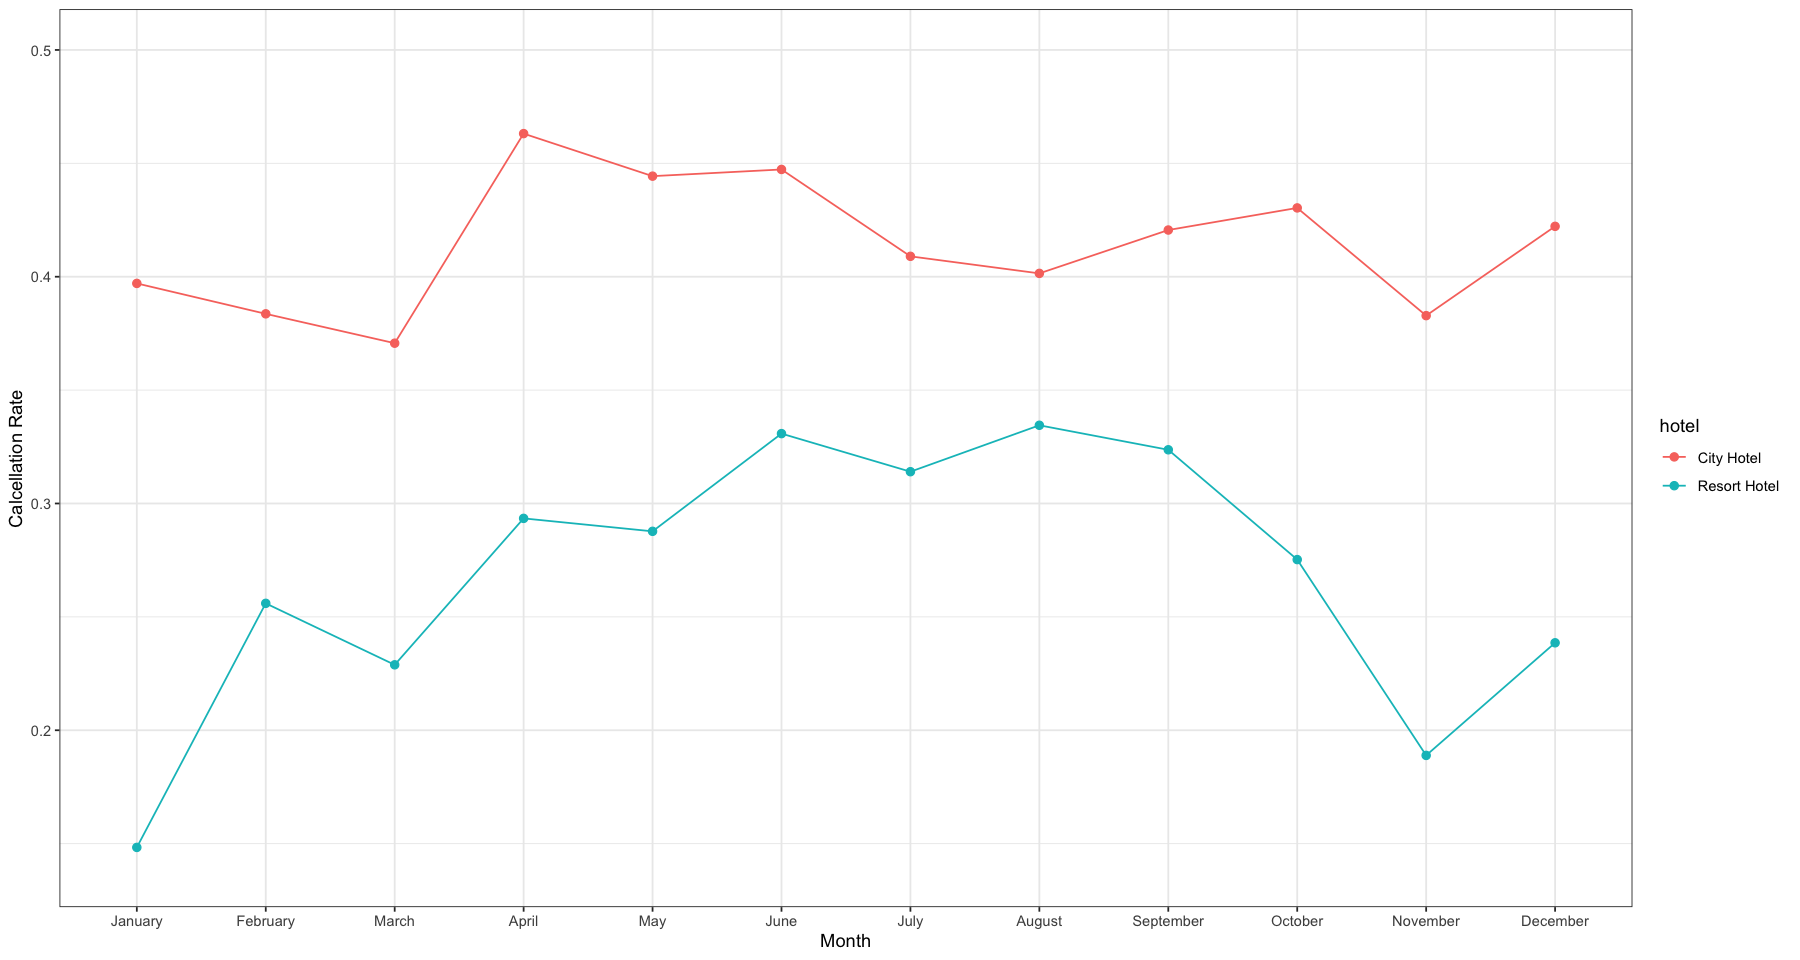

In [45]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = cancel_rate, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            ylim(0.14, 0.5) + 
            xlab('Month') + ylab('Calcellation Rate')

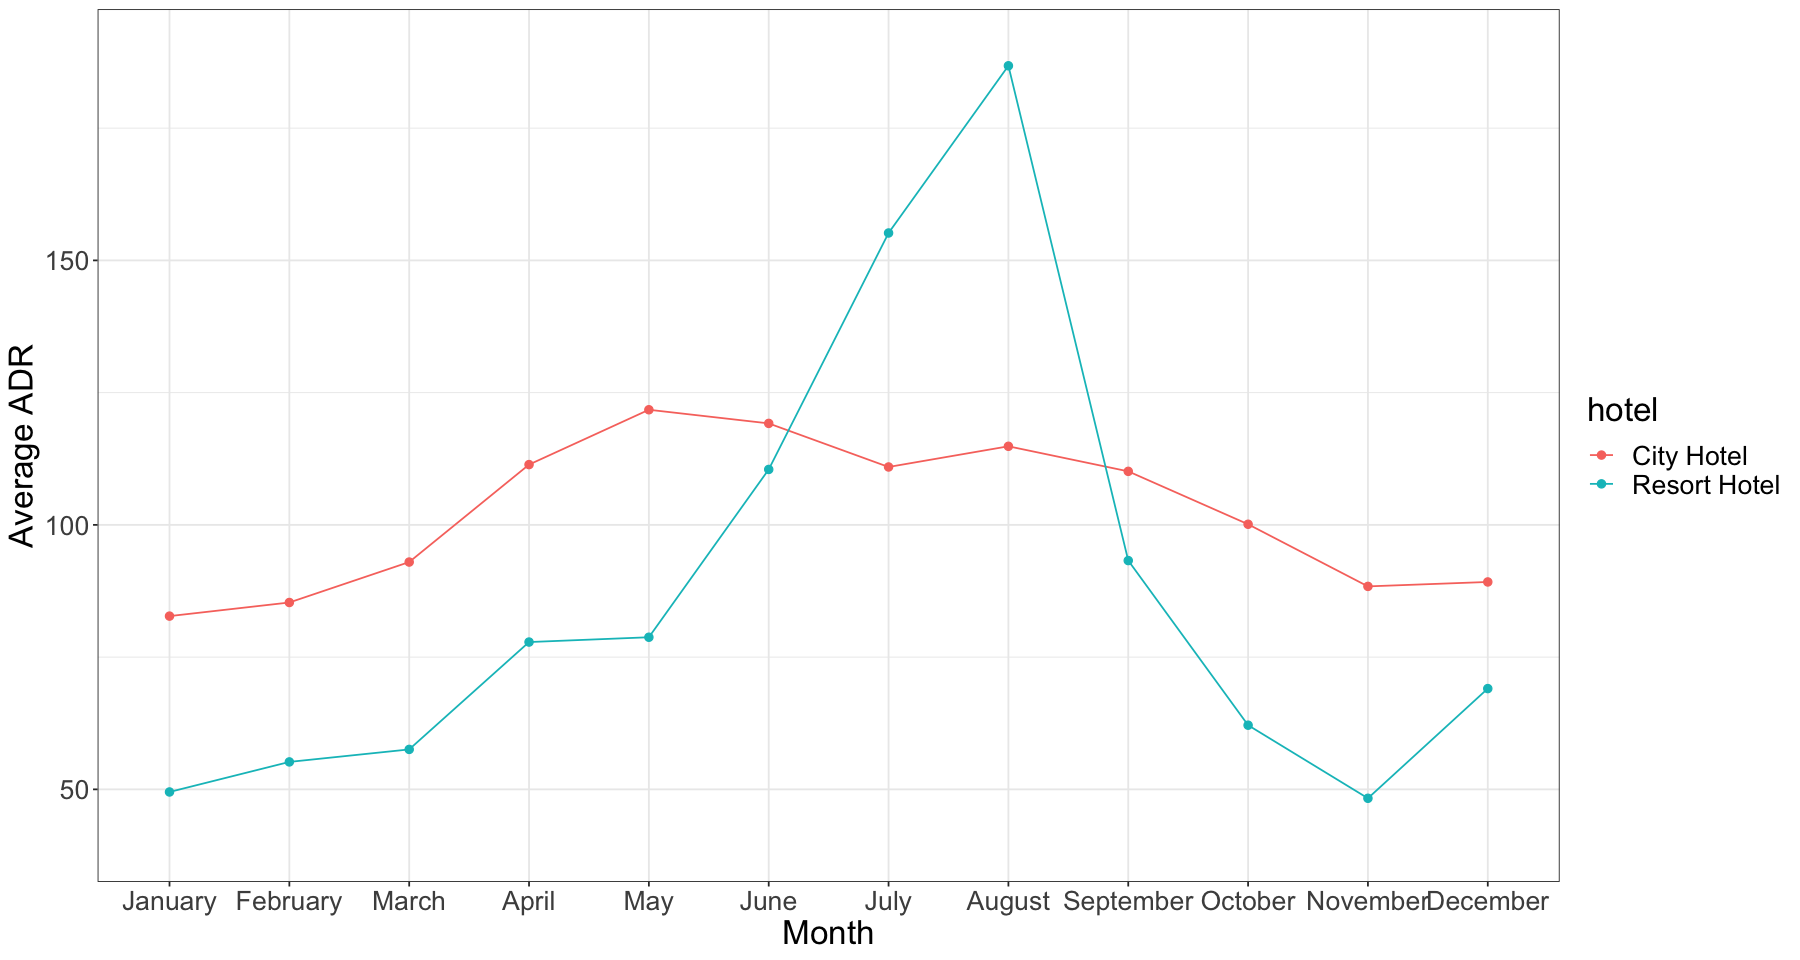

In [62]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_adr, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            ylim(40, 190) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average ADR')

This line chart shows the trend for ADR (average daily rate) for resort hotel and city hotel. We can see that, for resort hotels, high season is from June to August, while November to March is low season. ADR for high season is more than three times of that for low season. For city hotels, however, there is no obvious high season and low season, and prices are quite stable during the year. 

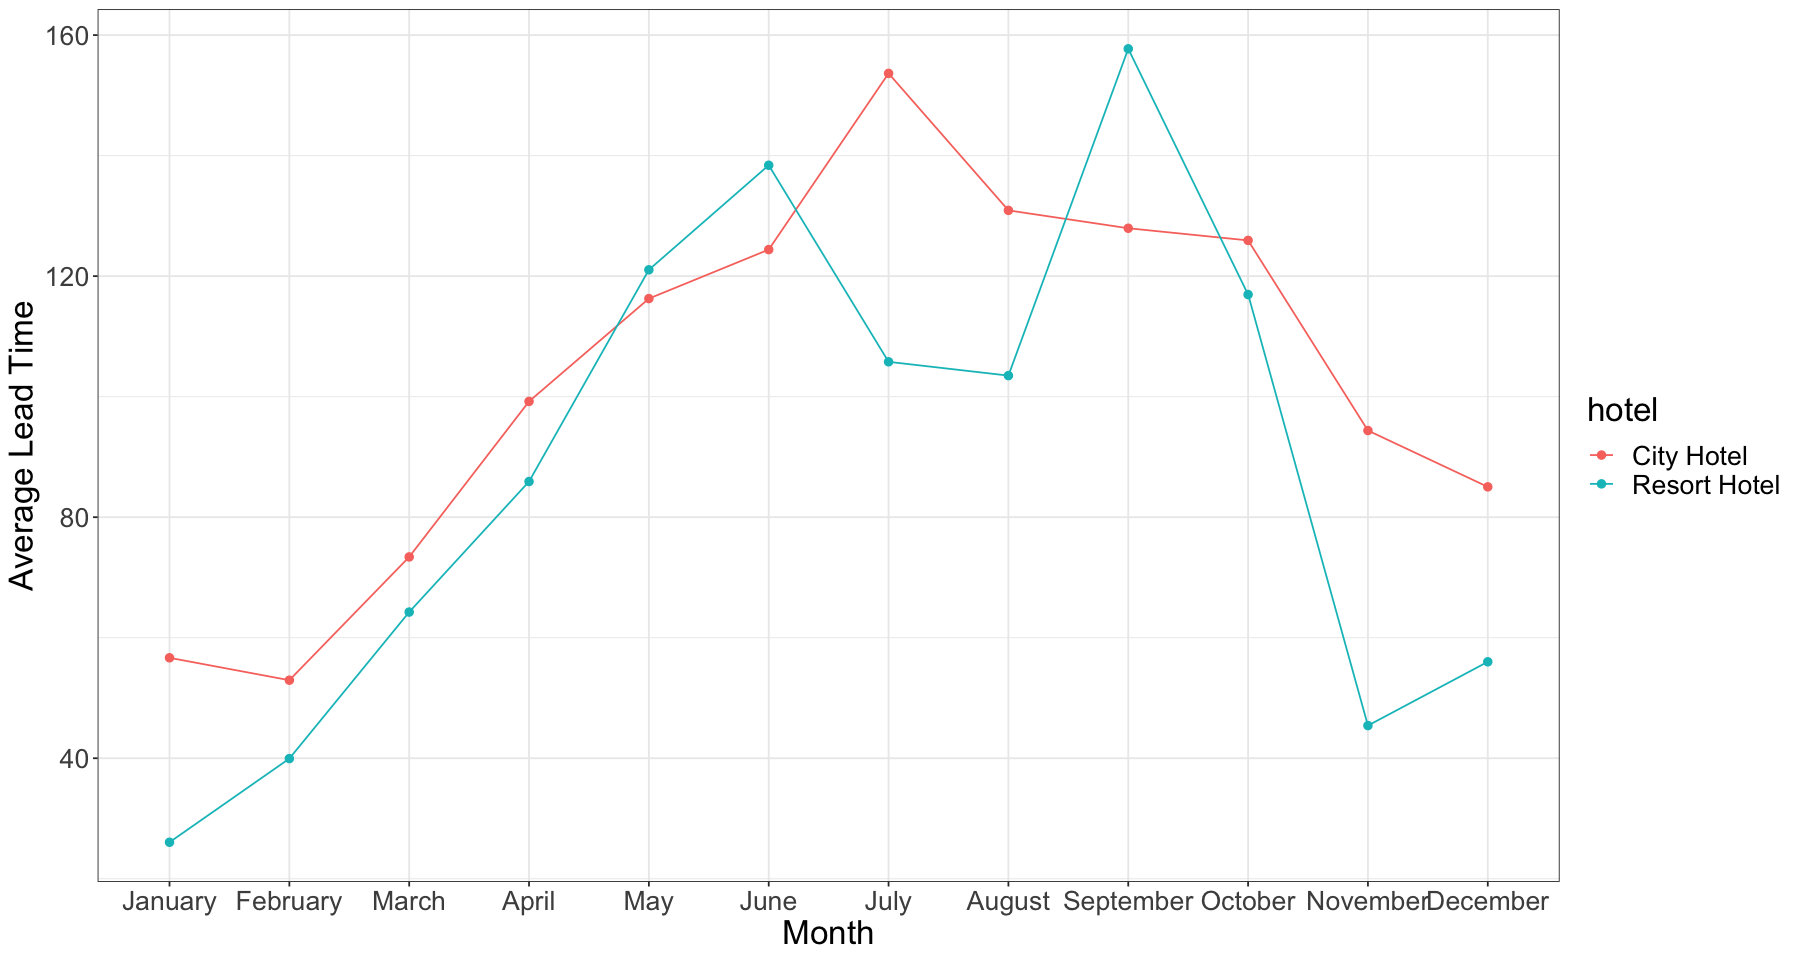

In [61]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_lead_time, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            #ylim(30, 160) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average Lead Time')

In [48]:
data1_cal

hotel,month,cancel_rate,avg_lead_time,avg_nights_wknd,avg_nights_week,avg_adults,avg_children,avg_babies,avg_person,avg_total_nights,avg_adr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
City Hotel,April,0.4631142,99.21248,0.8550007,2.191324,1.913241,0.10536886,0.003213282,2.021824,3.046325,111.39741
City Hotel,August,0.4014721,130.91402,0.8367347,2.315156,1.989629,0.16716851,0.006802721,2.163600,3.151890,114.85733
City Hotel,December,0.4222168,85.03209,0.8424891,2.372387,1.849538,0.12105007,0.009236753,1.979825,3.214876,89.20956
City Hotel,February,0.3836364,52.95071,0.8379798,2.146667,1.787071,0.10080808,0.006262626,1.894141,2.984646,85.32752
City Hotel,January,0.3970509,56.66622,0.7855228,2.210188,1.709920,0.08391421,0.008042895,1.801877,2.995710,82.75448
City Hotel,July,0.4089952,153.64750,0.9071986,2.229959,1.979309,0.14781316,0.004336513,2.131458,3.137158,110.94595
City Hotel,June,0.4473050,124.40304,0.6994293,2.186557,1.841344,0.07216233,0.003551046,1.917058,2.885986,119.18606
City Hotel,March,0.3706870,73.40426,0.7645322,2.279764,1.843021,0.06900839,0.004818154,1.916848,3.044296,92.97334
City Hotel,May,0.4443498,116.27454,0.7343389,2.104975,1.819487,0.05948181,0.002067875,1.881036,2.839314,121.76461


In [49]:
data1_cal_long = data1_cal %>% pivot_longer(cols = starts_with('avg_nights_'), names_to = "when", 
                                           names_prefix = "avg_nights_", values_to = "avg_nights")
data1_cal_long

hotel,month,cancel_rate,avg_lead_time,avg_adults,avg_children,avg_babies,avg_person,avg_total_nights,avg_adr,when,avg_nights
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
City Hotel,April,0.4631142,99.21248,1.913241,0.10536886,0.003213282,2.021824,3.046325,111.39741,wknd,0.8550007
City Hotel,April,0.4631142,99.21248,1.913241,0.10536886,0.003213282,2.021824,3.046325,111.39741,week,2.1913241
City Hotel,August,0.4014721,130.91402,1.989629,0.16716851,0.006802721,2.163600,3.151890,114.85733,wknd,0.8367347
City Hotel,August,0.4014721,130.91402,1.989629,0.16716851,0.006802721,2.163600,3.151890,114.85733,week,2.3151556
City Hotel,December,0.4222168,85.03209,1.849538,0.12105007,0.009236753,1.979825,3.214876,89.20956,wknd,0.8424891
City Hotel,December,0.4222168,85.03209,1.849538,0.12105007,0.009236753,1.979825,3.214876,89.20956,week,2.3723870
City Hotel,February,0.3836364,52.95071,1.787071,0.10080808,0.006262626,1.894141,2.984646,85.32752,wknd,0.8379798
City Hotel,February,0.3836364,52.95071,1.787071,0.10080808,0.006262626,1.894141,2.984646,85.32752,week,2.1466667
City Hotel,January,0.3970509,56.66622,1.709920,0.08391421,0.008042895,1.801877,2.995710,82.75448,wknd,0.7855228


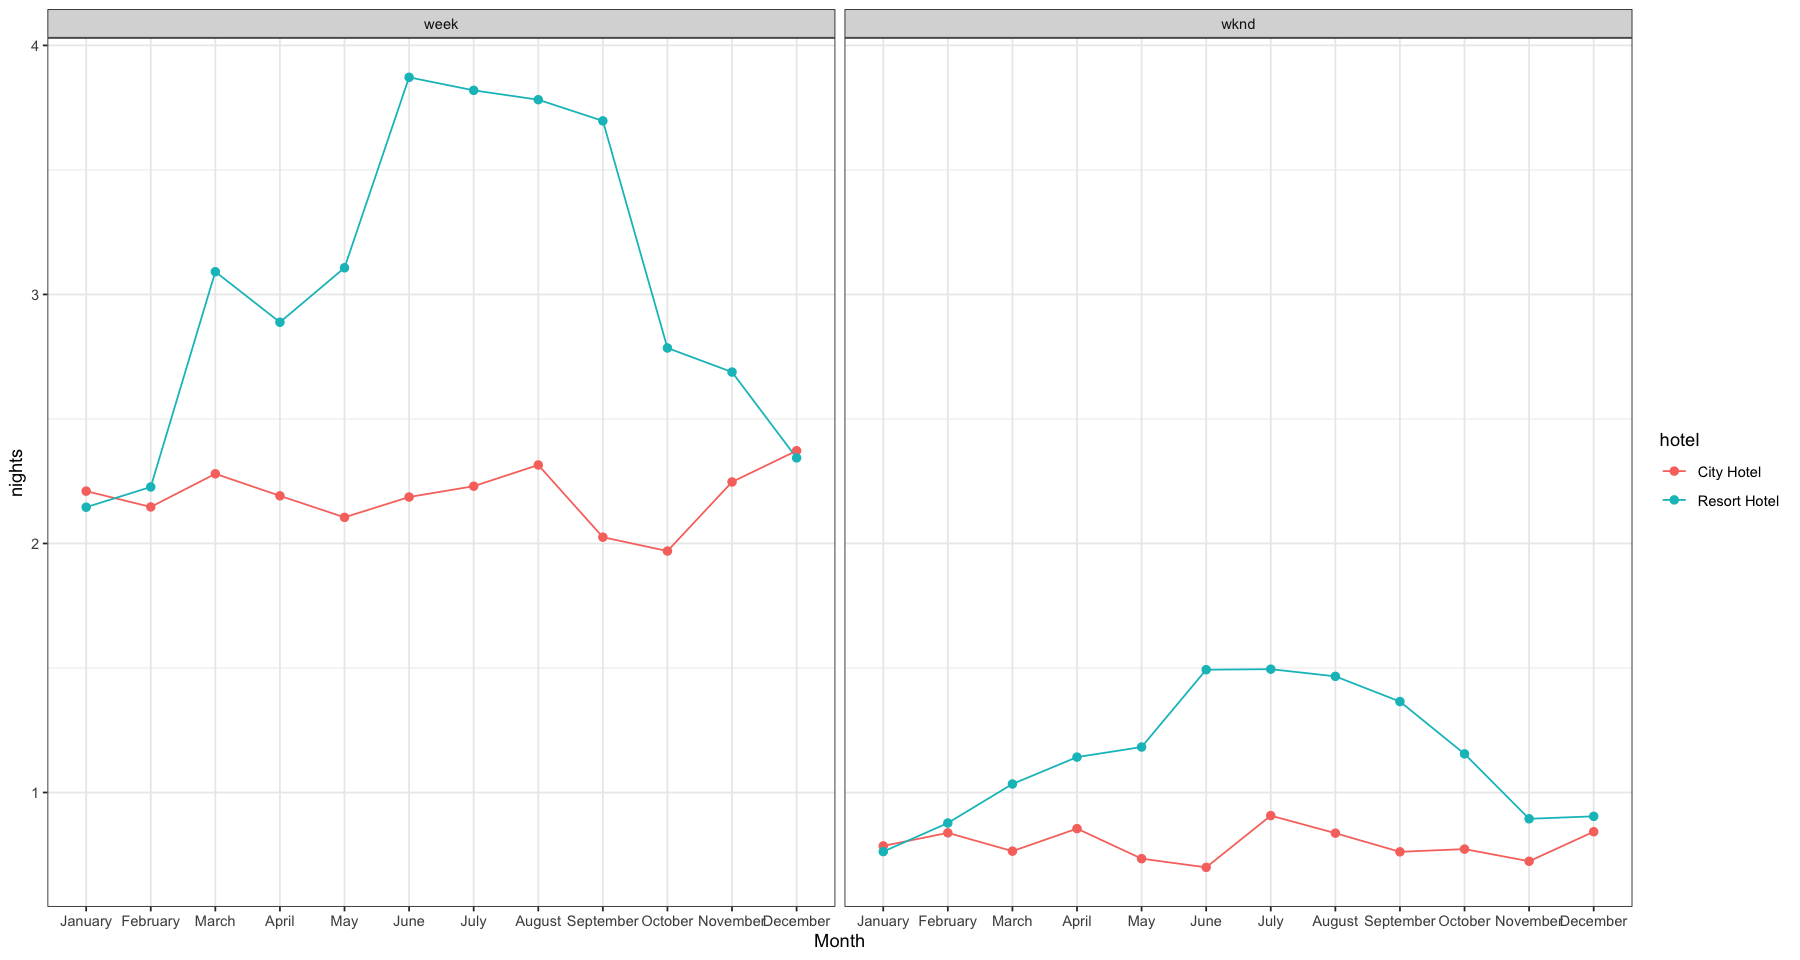

In [50]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal_long %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_nights, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            facet_wrap(~when) + 
            #ylim(30, 160) + 
            xlab('Month') + ylab('nights')

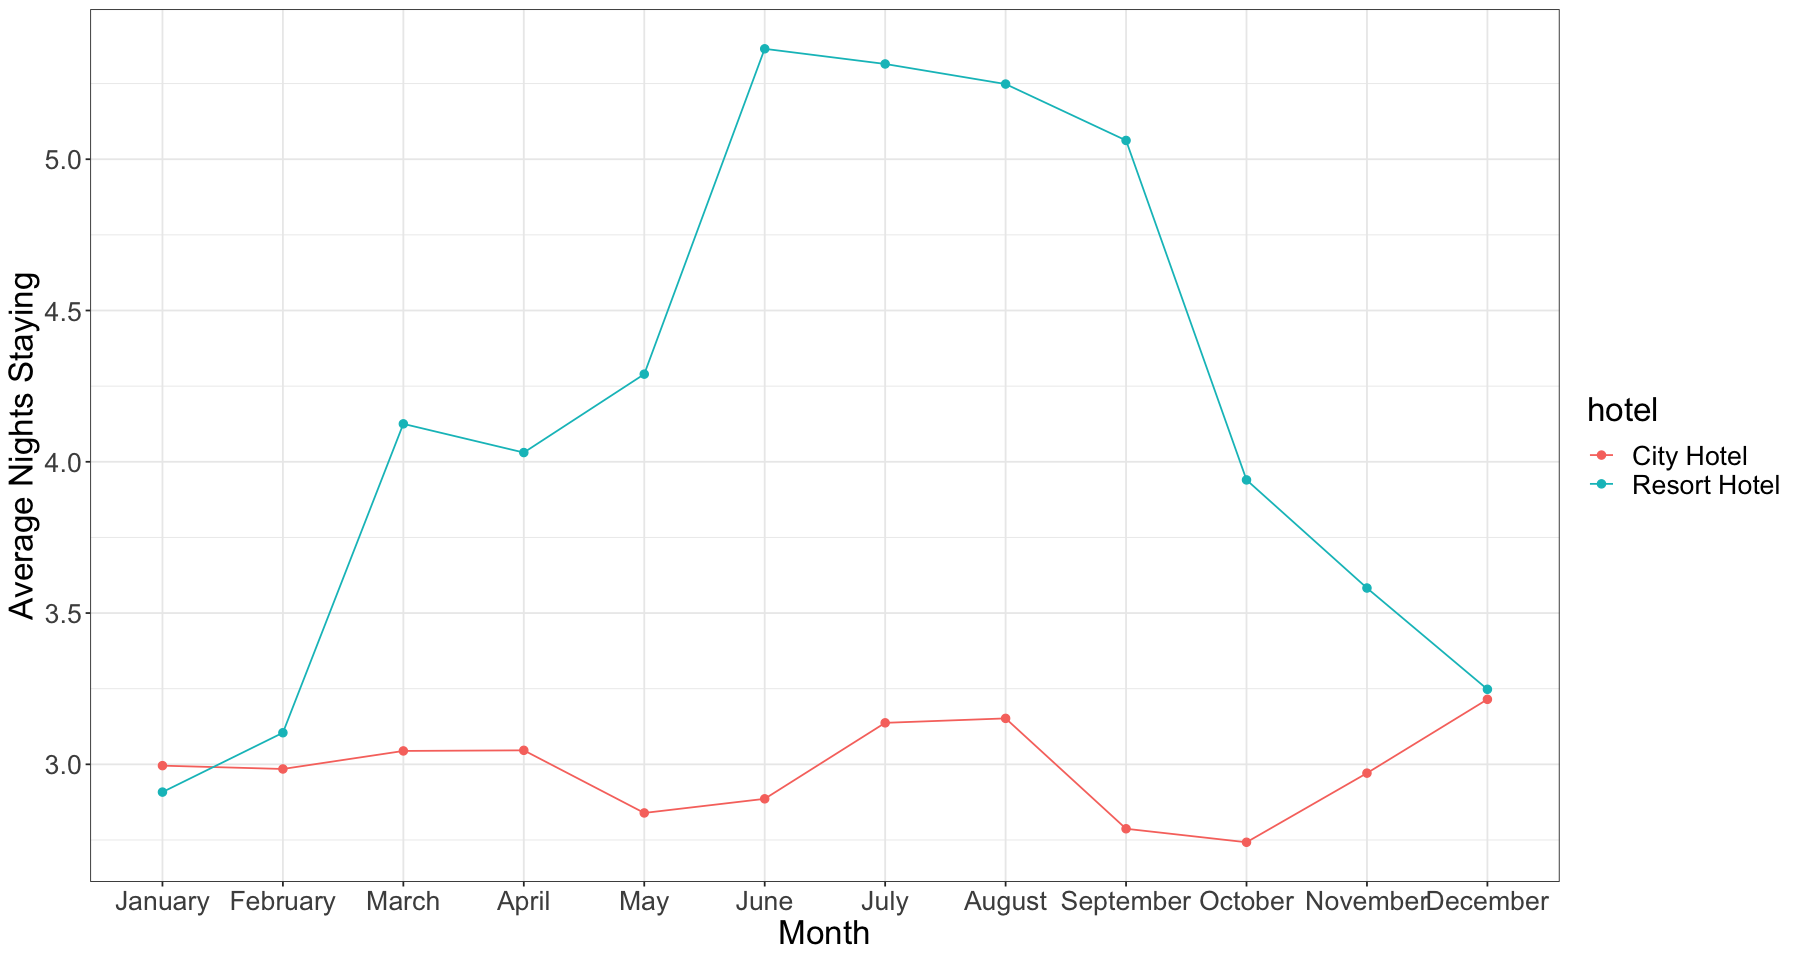

In [60]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_total_nights, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            #ylim(1.65, 2.05) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average Nights Staying')

This line chart shows the trend for total nights of staying for resort hotel and city hotel. We can see that, for resort hotels, for June to September, customers live more than 5 nights, while for December to February, customers only live for less than three nights. However, for city hotel, it is stable for the whole year with around three nights of staying. 

In [31]:
data1_cal

hotel,month,cancel_rate,avg_lead_time,avg_nights_wknd,avg_nights_week,avg_adults,avg_children,avg_babies,avg_person,avg_adr
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
City Hotel,April,0.4631142,99.21248,0.8550007,2.191324,1.913241,0.10536886,0.003213282,2.021824,111.39741
City Hotel,August,0.4014721,130.91402,0.8367347,2.315156,1.989629,0.16716851,0.006802721,2.163600,114.85733
City Hotel,December,0.4222168,85.03209,0.8424891,2.372387,1.849538,0.12105007,0.009236753,1.979825,89.20956
City Hotel,February,0.3836364,52.95071,0.8379798,2.146667,1.787071,0.10080808,0.006262626,1.894141,85.32752
City Hotel,January,0.3970509,56.66622,0.7855228,2.210188,1.709920,0.08391421,0.008042895,1.801877,82.75448
City Hotel,July,0.4089952,153.64750,0.9071986,2.229959,1.979309,0.14781316,0.004336513,2.131458,110.94595
City Hotel,June,0.4473050,124.40304,0.6994293,2.186557,1.841344,0.07216233,0.003551046,1.917058,119.18606
City Hotel,March,0.3706870,73.40426,0.7645322,2.279764,1.843021,0.06900839,0.004818154,1.916848,92.97334
City Hotel,May,0.4443498,116.27454,0.7343389,2.104975,1.819487,0.05948181,0.002067875,1.881036,121.76461


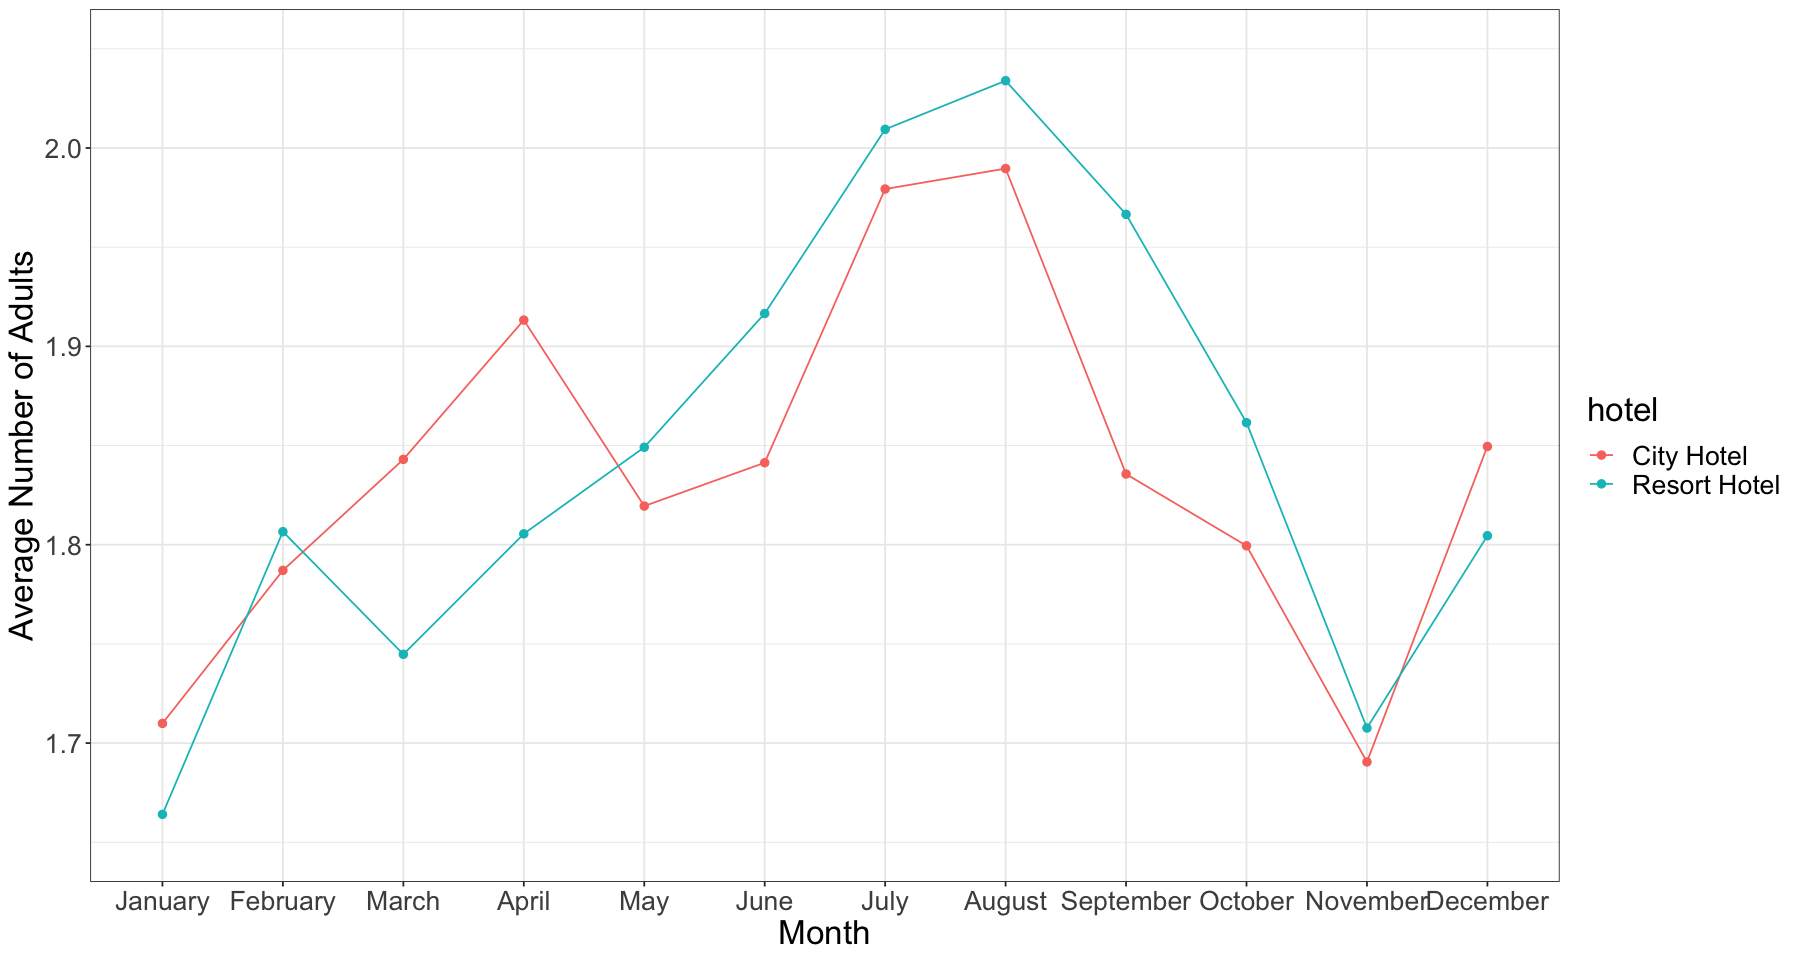

In [57]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_adults, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            ylim(1.65, 2.05) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average Number of Adults')

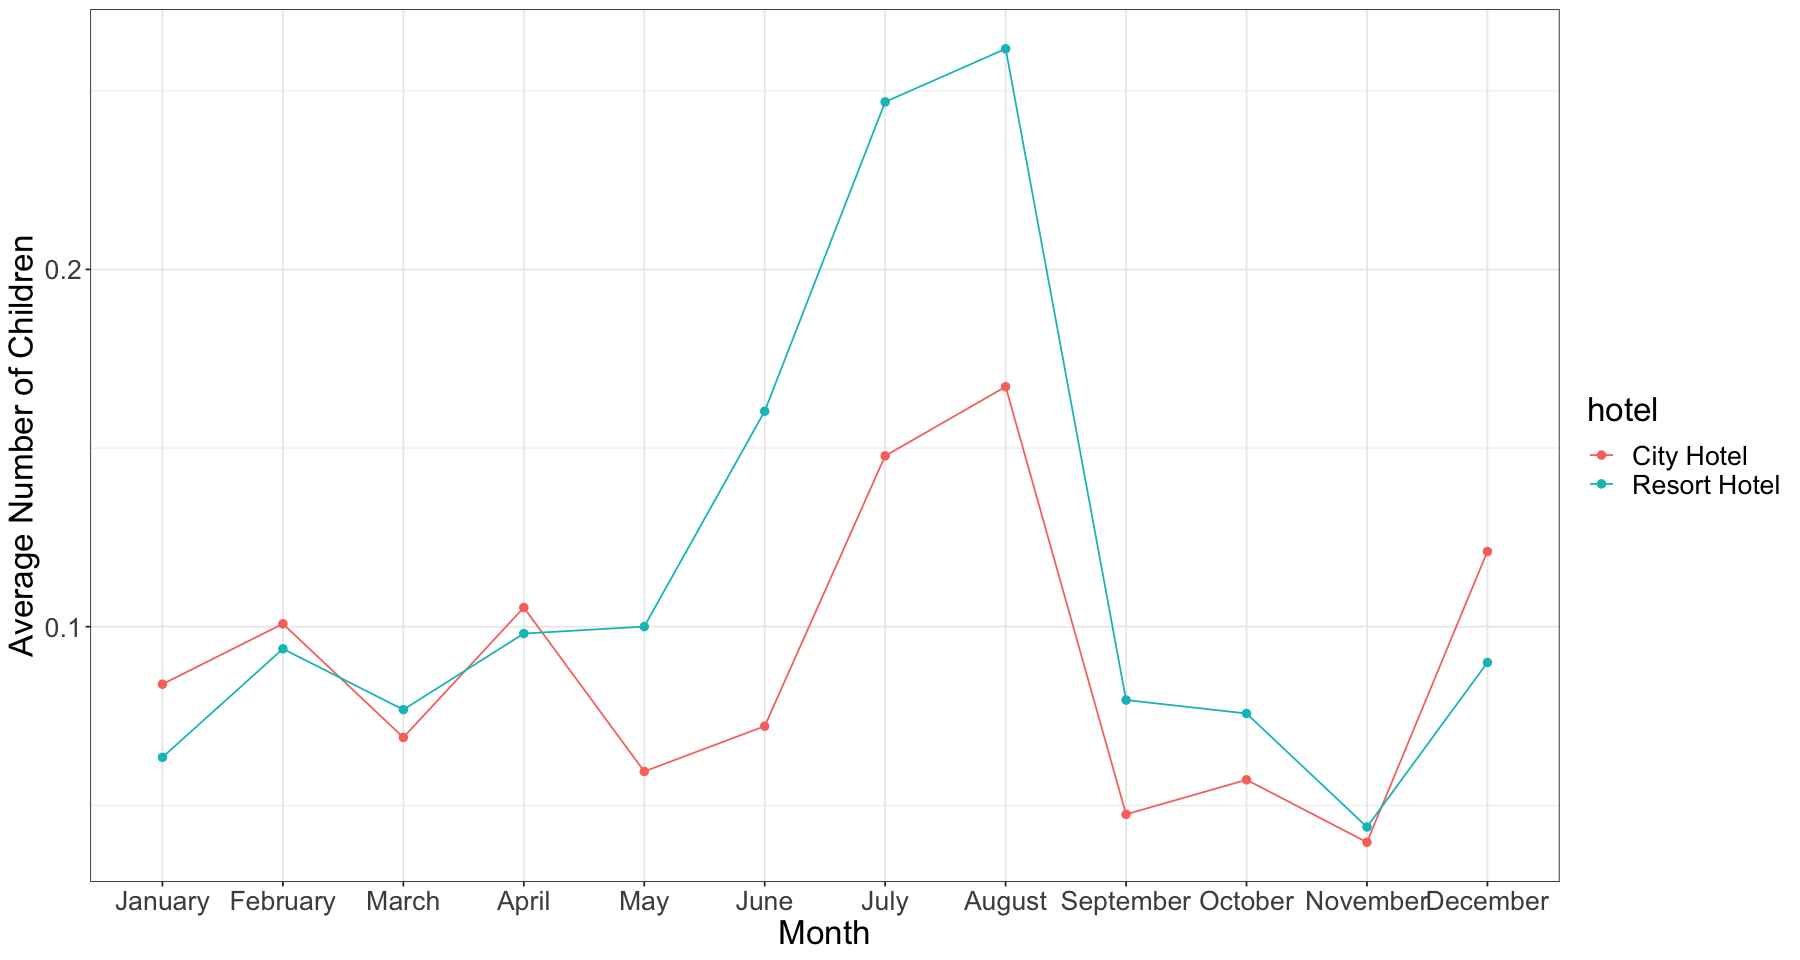

In [56]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_children, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            #ylim(1.65, 2.05) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average Number of Children')

For both city hotel and resort hotel, adults and chidren 

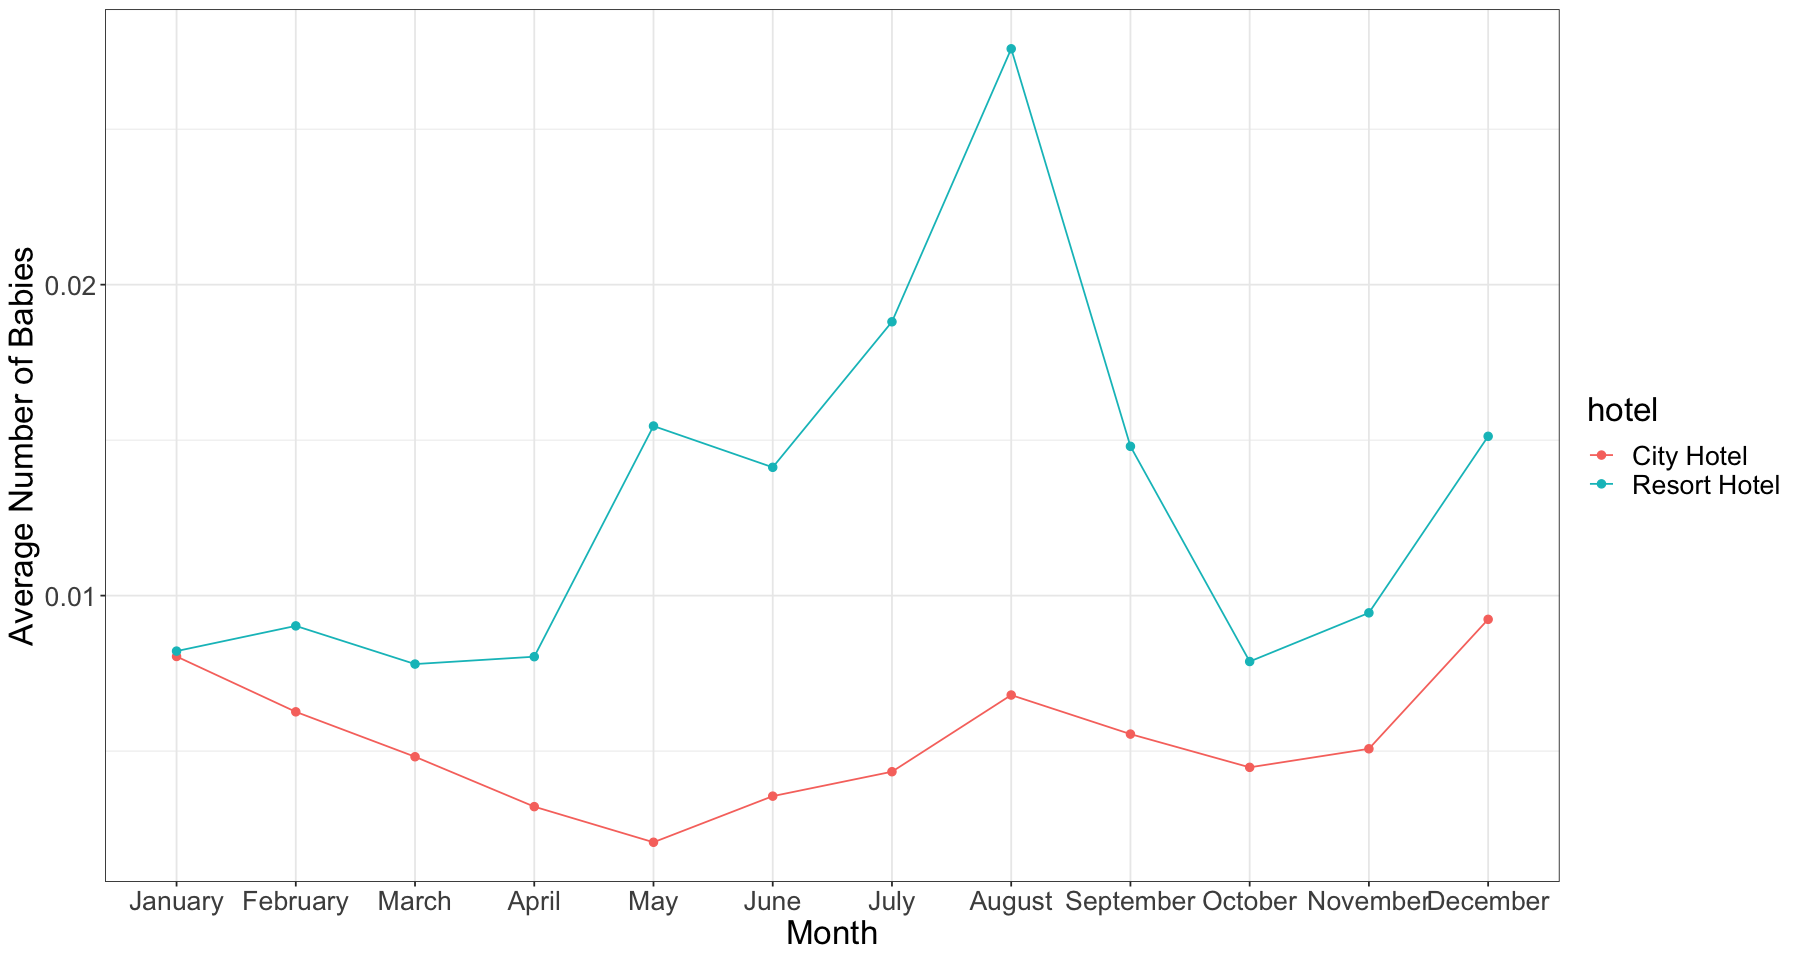

In [55]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_babies, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            #ylim(1.65, 2.05) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average Number of Babies')

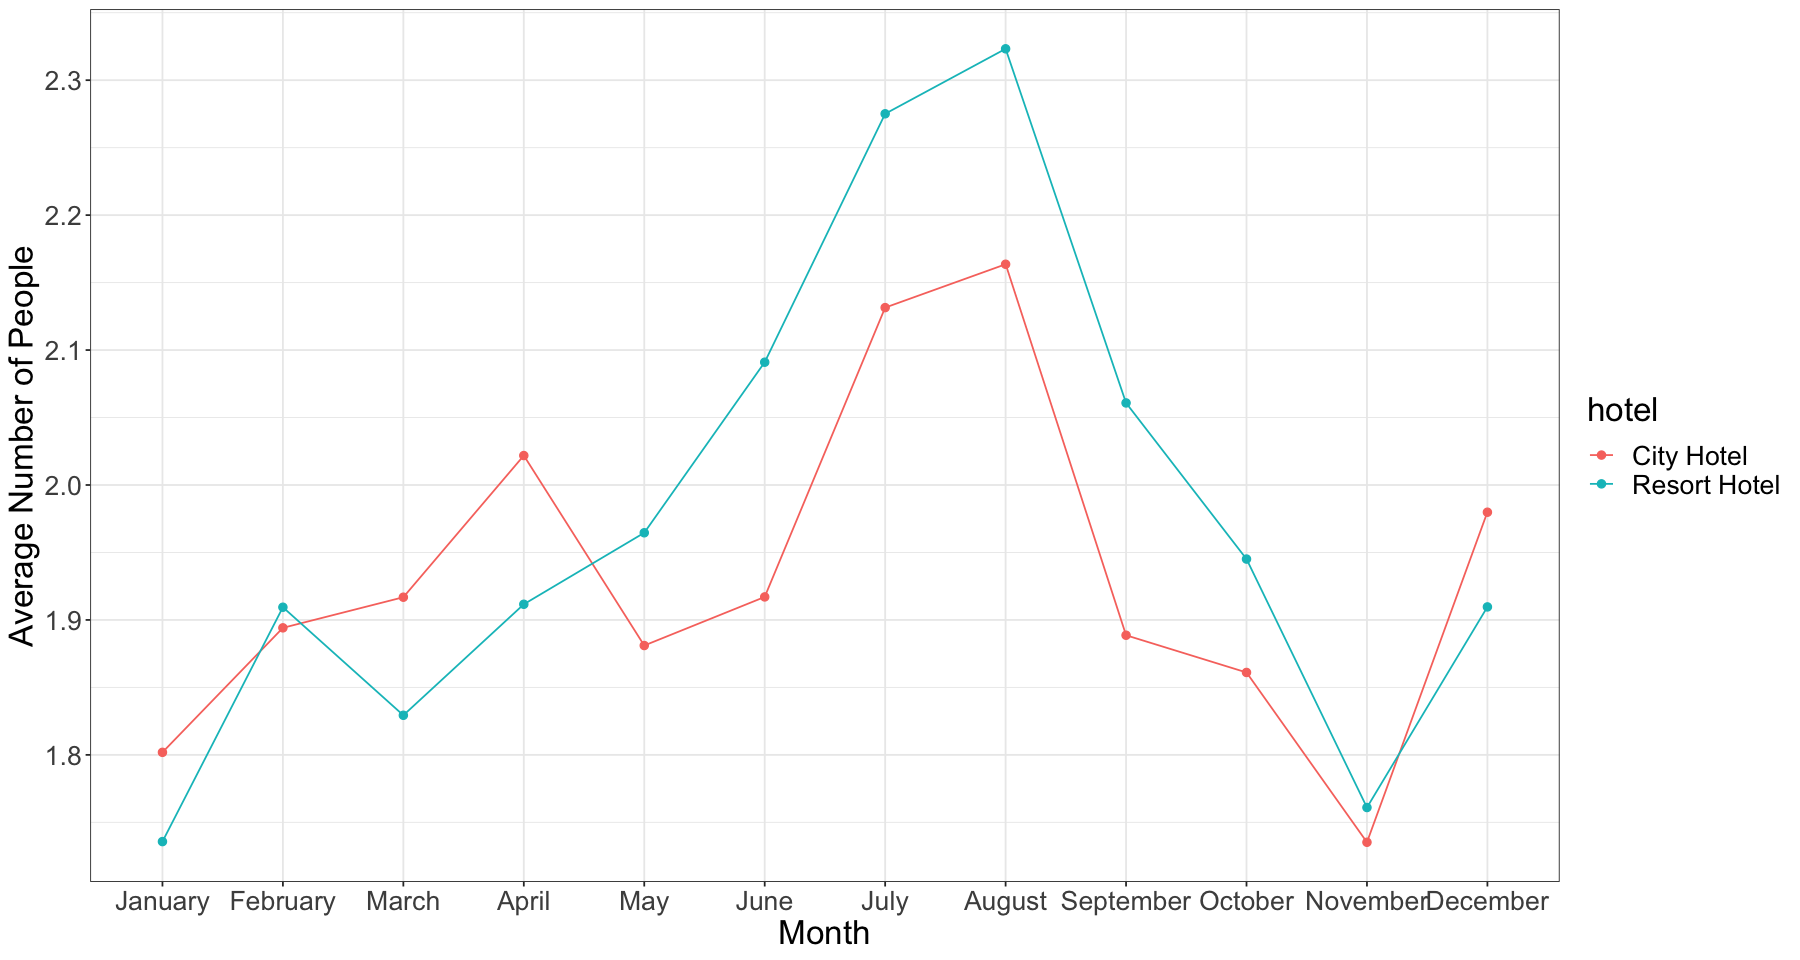

In [54]:
options(repr.plot.width = 15, repr.plot.height = 8)

data1_cal %>% ggplot(aes(x = factor(month, levels = month.name), y = avg_person, group = hotel, color = hotel)) + 
            geom_line() +  
            geom_point(aes(color = hotel), size = 2) + theme_bw() + 
            #ylim(1.65, 2.05) + 
            theme(text = element_text(size=20)) +
            xlab('Month') + ylab('Average Number of People')

I calculated average total number of person, which includes adults, children and babies. From this line chart, we can see that resort hotel and city hotel have really similar trends. In July and August, average number of person is larger than 2, which makes sense, because those month are common for family trips, no matter for city hotel or resort hotel. 

In [68]:
datanew$country

[1] "PRT"     "PRT"     "GBR"     "GBR"     "GBR"     "GBR"     "PRT"    
    [8] "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "USA"     "ESP"    
   [15] "PRT"     "IRL"     "PRT"     "IRL"     "FRA"     "GBR"     "GBR"    
   [22] "PRT"     "PRT"     "PRT"     "GBR"     "PRT"     "IRL"     "PRT"    
   [29] "PRT"     "PRT"     "Unknown" "GBR"     "PRT"     "IRL"     "PRT"    
   [36] "PRT"     "ESP"     "PRT"     "PRT"     "ROU"     "PRT"     "IRL"    
   [43] "ESP"     "ROU"     "PRT"     "PRT"     "ESP"     "NOR"     "GBR"    
   [50] "IRL"     "NOR"     "IRL"     "OMN"     "ESP"     "ARG"     "ESP"    
   [57] "PRT"     "PRT"     "PRT"     "USA"     "PRT"     "IRL"     "ESP"    
   [64] "IRL"     "PRT"     "USA"     "ESP"     "POL"     "PRT"     "PRT"    
   [71] "PRT"     "PRT"     "PRT"     "ESP"     "PRT"     "ESP"     "PRT"    
   [78] "PRT"     "DEU"     "PRT"     "FRA"     "PRT"     "GBR"     "PRT"    
   [85] "GBR"     "GBR"     "GBR"     "PRT"     "GBR"     "PRT"     "ESP"    
   [92] "PRT"     "USA"     "BEL"     "PRT"     "PRT"     "PRT"     "ESP"    
   [99] "PRT"     "DEU"     "ESP"     "FRA"     "FRA"     "PRT"     "PRT"    
  [106] "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "CHE"     "PRT"    
  [113] "GBR"     "PRT"     "PRT"     "PRT"     "GBR"     "PRT"     "PRT"    
  [120] "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "PRT"    
  [127] "ESP"     "FRA"     "PRT"     "FRA"     "FRA"     "ESP"     "PRT"    
  [134] "ESP"     "DEU"     "PRT"     "PRT"     "DEU"     "PRT"     "PRT"    
  [141] "PRT"     "FRA"     "ESP"     "CN"      "ESP"     "PRT"     "ESP"    
  [148] "PRT"     "PRT"     "PRT"     "PRT"     "IRL"     "PRT"     "ESP"    
  [155] "CHE"     "PRT"     "PRT"     "GBR"     "GBR"     "GBR"     "PRT"    
  [162] "PRT"     "USA"     "CN"      "CHE"     "PRT"     "USA"     "PRT"    
  [169] "PRT"     "PRT"     "PRT"     "USA"     "GRC"     "PRT"     "PRT"    
  [176] "PRT"     "PRT"     "PRT"     "ESP"     "PRT"     "PRT"     "PRT"    
  [183] "GBR"     "PRT"     "PRT"     "GBR"     "GBR"     "PRT"     "GBR"    
  [190] "FRA"     "ITA"     "GBR"     "PRT"     "PRT"     "ESP"     "PRT"    
  [197] "PRT"     "PRT"     "GBR"     "PRT"     "GBR"     "ESP"     "PRT"    
  [204] "USA"     "NLD"     "PRT"     "PRT"     "IRL"     "PRT"     "IRL"    
  [211] "GBR"     "PRT"     "ESP"     "PRT"     "ESP"     "PRT"     "PRT"    
  [218] "PRT"     "PRT"     "PRT"     "CHE"     "PRT"     "PRT"     "PRT"    
  [225] "GBR"     "GBR"     "PRT"     "IRL"     "DNK"     "DNK"     "PRT"    
  [232] "ARG"     "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "PRT"    
  [239] "PRT"     "RUS"     "SWE"     "POL"     "FRA"     "GBR"     "GBR"    
  [246] "GBR"     "PRT"     "PRT"     "USA"     "PRT"     "PRT"     "PRT"    
  [253] "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "GBR"     "AUS"    
  [260] "GBR"     "PRT"     "PRT"     "PRT"     "POL"     "PRT"     "EST"    
  [267] "PRT"     "PRT"     "PRT"     "PRT"     "RUS"     "GBR"     "PRT"    
  [274] "PRT"     "IRL"     "PRT"     "GBR"     "DNK"     "GBR"     "GBR"    
  [281] "PRT"     "ESP"     "PRT"     "PRT"     "PRT"     "ESP"     "PRT"    
  [288] "PRT"     "GBR"     "PRT"     "CZE"     "GBR"     "DEU"     "ESP"    
  [295] "ESP"     "PRT"     "ESP"     "ROU"     "PRT"     "ESP"     "PRT"    
  [302] "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "PRT"     "CN"     
  [309] "PRT"     "PRT"     "PRT"     "GBR"     "BRA"     "PRT"     "ESP"    
  [316] "PRT"     "GBR"     "PRT"     "PRT"     "GBR"     "PRT"     "GBR"    
  [323] "ESP"     "PRT"     "FRA"     "PRT"     "GBR"     "GBR"     "PRT"    
  [330] "GBR"     "PRT"     "BEL"     "ESP"     "FRA"     "ESP"     "BEL"    
  [337] "ITA"     "ESP"     "PRT"     "FRA"     "FIN"     "CN"      "ESP"    
  [344] "PRT"     "IRL"     "ESP"     "ESP"     "PRT"     "PRT"     "GBR"    
  [351] "ESP"     "ESP"     "AUS"     "ESP"     "PRT"     "ESP"     "ESP"    
  [358] "PRT"     "USA"   

need to decode first